# Automatic Feature Selection

- 차원을 줄여보자.
- 방법 : Univariate Selection, Model-based Selection, Iterative Selection

## 1. Univarivate Selection
- label과 feature 하나하나를 pair하게 비교하여 Selection
- P-value가 낮은 순서대로 Selection
- SelectKBest : 피쳐의 갯수 K개 만큼 선택
- SelectPercentile : 갯수가 아닌 Percent로 선택

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile  #k개만큼 select or 50%만 select

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = load_breast_cancer()

cancer.data.shape
#처음 피쳐의 갯수는 30개이다.

(569, 30)

In [3]:
#여기에 아무 의미 없는 피쳐 30개를 더 만들어 보자
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 30))
noise.shape
#의미없는 피쳐 30개

(569, 30)

In [4]:
#두개를 합치자
X_w_noise = np.hstack([cancer.data, noise])
X_w_noise.shape

(569, 60)

데이터 나누기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target,
                                                   random_state = 0, test_size = 0.5)

본격적으로 Feature Selection하기

In [6]:
select1 = SelectPercentile(percentile=50)  #가장 유의한 50%만 select
select1.fit(X_train, y_train)  #통계적으로 pvalue를 보기위해 fit
X_train_selected = select1.transform(X_train)

print("Shape of X_train", X_train.shape)
print("Shape of X_train_selected", X_train_selected.shape)  #통계적으로 유의한건 30개다 --pvalue로 판단

Shape of X_train (284, 60)
Shape of X_train_selected (284, 30)


In [7]:
import matplotlib.pyplot as plt

어떤 놈들이 Selection 됐을까?

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False  True False False False
 False False False  True False False False False  True False  True False]


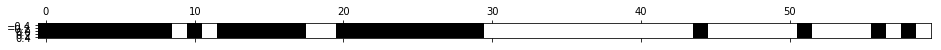

In [8]:
mask = select1.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')  #검은색이 select된 애들 

#### 선택 전 후 성능 비교해보기

In [9]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select1.transform(X_test)
logist = LogisticRegression()
logist.fit(X_train, y_train)
print("All Feature Score is ", logist.score(X_test, y_test))  #r-square

logist.fit(X_train_selected, y_train)
print("Selected Feature Score is ", logist.score(X_test_selected, y_test))

All Feature Score is  0.9298245614035088
Selected Feature Score is  0.9508771929824561


아래는 SelectKBest 방법입니다.

In [10]:
select2 = SelectKBest(k=30)
select2.fit(X_train, y_train)
X_train_selected = select2.transform(X_train)

print("Shape of X_train", X_train.shape)
print("Shape of X_train_selected", X_train_selected.shape)

Shape of X_train (284, 60)
Shape of X_train_selected (284, 30)


## 2. Model-Based Feature Selection
- feature의 Importance를 뽑아 낼 수 있는 모델을 사용하여 Feature Selection을 실시

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select3 = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42),  #rf했을 때 나오는 중요도 median을 기준으로 작은놈은 버리겠다
                          threshold = "median")
select3.fit(X_train, y_train)
X_train_selected = select3.transform(X_train)

print("Shape of X_train", X_train.shape)
print("Shape of X_train_selected", X_train_selected.shape)

Shape of X_train (284, 60)
Shape of X_train_selected (284, 30)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False  True False  True
 False  True False False False False False False False False False False]


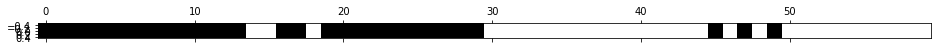

In [12]:
mask = select3.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')

In [13]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select3.transform(X_test)
logist = LogisticRegression()
logist.fit(X_train, y_train)
print("All Feature Score is ", logist.score(X_test, y_test))

logist.fit(X_train_selected, y_train)
print("Selected Feature Score is ", logist.score(X_test_selected, y_test))

All Feature Score is  0.9298245614035088
Selected Feature Score is  0.9543859649122807


# 3. Iteractive Selection

In [24]:
from sklearn.feature_selection import RFE

select4 = RFE(RandomForestClassifier(), 30, step=100)  #rf로 가장 작은 놈 버리고 다시 돌려보고 다시 버리고 다시 돌려보고 
select4.fit(X_train, y_train)

X_train_selected = select4.transform(X_train)

print("Shape of X_train", X_train.shape)
print("Shape of X_train_selected", X_train_selected.shape)

Shape of X_train (284, 60)
Shape of X_train_selected (284, 30)


[ True  True False  True False  True  True  True  True False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True False False False  True False
  True False False False  True False False False False  True False False
 False  True False False False False False  True  True False False False]


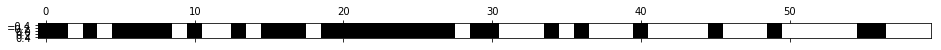

In [27]:
mask = select4.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')

In [28]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select4.transform(X_test)
logist = LogisticRegression()
logist.fit(X_train, y_train)
print("All Feature Score is ", logist.score(X_test, y_test))

logist.fit(X_train_selected, y_train)
print("Selected Feature Score is ", logist.score(X_test_selected, y_test)) #성능이 가장 좋아짐 RFE방법이 가장 좋다고 알려짐!

All Feature Score is  0.9298245614035088
Selected Feature Score is  0.9614035087719298
